In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
245335,152705.0,-1.263688,-0.524995,0.348366,-2.163651,1.656718,-0.215330,1.274371,-0.995303,-0.997894,...,-0.067259,0.617739,-0.180970,0.203019,1.302329,-0.048426,-1.225785,-0.572694,6.00,0
251578,155400.0,-0.577476,-0.748670,3.019815,-3.305678,-0.844325,0.519855,-0.272373,-0.460032,-1.427950,...,-0.014616,0.834109,-0.494118,-0.384277,0.260434,-0.169204,-0.641032,-0.629759,29.50,0
178427,123621.0,-1.492040,0.933364,1.754482,0.226592,-0.016229,-0.014928,0.212249,0.608405,-0.641346,...,-0.094152,-0.511148,-0.110743,-0.107049,0.389036,-0.870364,-0.164338,-0.013934,30.97,0
178396,123608.0,0.130504,0.778806,-0.728401,-0.200518,0.030241,-1.114073,0.850320,0.078820,-0.385439,...,0.007096,-0.075396,0.280533,0.015731,-0.611338,0.431168,-0.173447,-0.081303,62.80,0
88922,62348.0,0.244449,-0.414561,0.078653,-2.627398,-0.641671,0.721842,-1.889174,-2.506738,-2.310605,...,-1.527355,-0.141749,-0.173095,-1.462775,0.757408,-0.239690,0.089352,0.223658,10.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
legit=df[df.Class==0]

In [8]:
fraud=df[df.Class==1]

In [9]:
legit.shape

(284315, 31)

In [10]:
fraud.shape

(492, 31)

In [11]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
legit_sample=legit.sample(492)

In [15]:
data=pd.concat([legit_sample,fraud],axis=0)

In [16]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32375,36771.0,1.133123,-0.151894,-0.232243,0.048468,-0.213757,-1.006288,0.438138,-0.305951,-0.024864,...,-0.414797,-1.489571,0.056382,-0.105302,0.123444,0.642852,-0.122287,0.016533,111.93,0
134222,80705.0,-0.677428,-0.510220,1.080399,-1.797926,0.279988,-0.178290,-0.119393,0.035451,-1.385456,...,-0.542904,-1.172288,0.317926,-0.848074,-0.312432,0.628174,-0.159106,0.000337,33.35,0
130260,79318.0,1.202724,-0.491866,0.855305,-0.762184,-1.140289,-0.386163,-0.739263,0.179790,2.016052,...,0.000228,0.221416,0.009593,0.062201,0.383015,-0.652496,0.101566,0.029071,1.00,0
173021,121330.0,1.652026,-0.918308,-0.136949,0.526144,-0.851720,0.184535,-0.700770,0.133305,0.940920,...,0.157163,0.289838,0.130885,-0.358381,-0.566280,0.155531,-0.015034,-0.020469,155.32,0
162313,115011.0,-1.321391,0.023490,0.494110,-0.679563,2.200476,1.263058,0.323511,0.483041,-0.451170,...,0.355344,1.108498,-0.219133,-0.935249,0.940431,-0.070057,-0.024910,0.068040,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [17]:
data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [18]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95969.014228,0.117527,0.008670,-0.040094,0.042934,-0.030128,-0.070773,0.001361,-0.019436,-0.044007,...,-0.023911,0.046150,0.025373,0.031405,0.024532,-0.013368,-0.004060,-0.041794,-0.011638,80.943150
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
X=data.drop(columns='Class',axis=1)

In [20]:
Y=data['Class']

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [22]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
100623,67571.0,-0.758469,-0.045410,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,0.618203,...,-0.032500,0.042619,0.397224,0.072229,-0.242276,0.560916,-0.540955,0.150606,-0.117140,549.06
82660,59494.0,-0.264007,1.076411,0.993488,0.605006,0.544696,-0.308787,0.888528,-0.255275,-0.083457,...,0.132607,0.004178,0.261770,-0.297213,-0.474196,-0.164075,-0.302786,0.108370,-0.008512,2.54
166150,117894.0,-0.389136,0.626095,0.353354,-0.736167,0.707650,-0.131568,0.783955,0.147120,-0.023260,...,-0.031251,0.227208,0.863939,-0.269663,0.761133,-0.090607,0.629693,0.328646,0.212145,12.31
207112,136524.0,-0.491833,0.910657,-0.207835,0.254077,1.263415,-0.691641,1.782956,-0.616619,-0.503901,...,-0.292929,0.225455,0.988742,-0.084362,-0.009094,-0.477771,-0.747516,-0.316452,0.059348,42.00
209515,137600.0,1.883560,-0.648591,-0.034835,0.443700,-0.874347,0.103488,-0.968113,0.254594,1.195043,...,-0.176964,0.065959,0.223633,0.256070,-0.407947,-0.575671,0.173687,-0.002634,-0.044845,34.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194814,130768.0,2.114035,-0.049150,-1.507247,0.293736,0.475621,-0.363963,0.117875,-0.178643,0.575054,...,-0.191299,-0.335791,-0.874949,0.283753,0.068462,-0.152595,0.024333,-0.063801,-0.057540,1.50
213078,139102.0,1.982759,-0.358758,-0.307049,0.467188,-0.629726,-0.516568,-0.488861,-0.162332,1.006481,...,-0.067929,0.209926,0.891187,0.085999,-0.001268,-0.154266,0.614076,-0.014742,-0.045093,20.54
223618,143456.0,-2.006582,3.676577,-5.463811,7.232058,-1.627859,-0.996755,-4.299833,2.268867,-3.651067,...,0.474414,0.713907,-0.063868,0.167947,-0.449864,0.023702,0.536905,0.485864,-0.042393,1.00
43061,41353.0,-15.020981,8.075240,-16.298091,5.664820,-11.918153,-4.246957,-14.716668,9.435084,-6.795398,...,-0.995787,2.525115,-0.832074,-0.186117,0.429781,0.697103,0.056031,-1.310888,-0.707403,34.12


In [23]:
Y_train

100623    1
82660     0
166150    0
207112    0
209515    0
         ..
194814    0
213078    0
223618    1
43061     1
216073    0
Name: Class, Length: 787, dtype: int64

In [24]:
lr=LogisticRegression()

In [25]:
lr.fit(X_train,Y_train)

C:\Users\DELL\Desktop\akkkkkkkkkkkkkk\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
#accuracy in training data
X_train_pred=lr.predict(X_train)
X_train_acc=accuracy_score(X_train_pred,Y_train)
X_train_acc

0.951715374841169

In [27]:
#accuracy in testing data
X_test_pred=lr.predict(X_test)
X_test_acc=accuracy_score(X_test_pred,Y_test)
X_test_acc

0.9187817258883249

# Implementing Report

In [28]:
from sklearn.metrics import classification_report , confusion_matrix

In [30]:
cm = np.array(confusion_matrix(Y_test, X_test_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
confusion

,predicted fraud,predicted normal
is Fraud,89,9
is Normal,7,92


<Axes: >

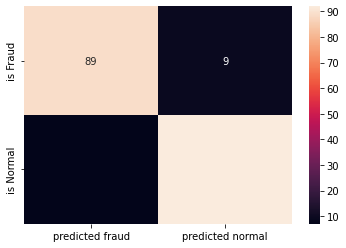

In [31]:
import seaborn as sns
sns.heatmap(confusion, annot=True)

In [34]:
print(classification_report(Y_test, X_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        99
           1       0.93      0.91      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

